In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Muestra inicial

En general uno tiene una sola muestra de la población que quiere estudiar. Consideremos el siguiente ejemplo, donde definimos la **muestra** como un conjunto de 20 números extraídos de una distribución gaussiana.

In [56]:
n = 10
mean = 2.0
sigma = 1.5
muestra = np.random.normal(loc=mean,scale=sigma,size=n)

Y supongamos que el estadístico que queremos calcular es la **media**

Media:  1.795502400993835


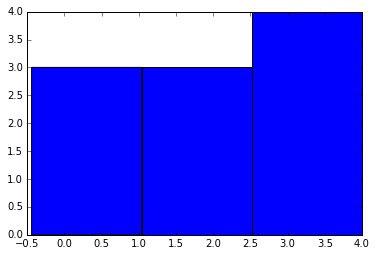

In [57]:
plt.hist(muestra,bins=int(np.sqrt(n)))
print "Media: ", muestra.mean()

Esta estimación de la **media** no coincidirá con la **media real** de la población, pues fue calculada con solo una muestra. La pregunta entonces es: ¿cómo podemos calcular el intevalo de confianza de dicha estimación?

Es aquí cuando el método de **bootstrap** viene a nuestro rescate. En sintésis, el método consiste en tomar **m** remuestreos de igual tamaño que la muestra original y aplicar el estadístico a cada uno de esos remuestreos. En cada uno de estos remuestreos se debe permitir el reemplazo, es decir, un elemento de la muestra original puede ser tomado en el remuestreo más de una vez.

In [58]:
def bootstrap(x,func,m=1000):
    y = np.zeros(m)
    for i in range(m):
        _x = np.random.choice(x,size=len(x))
        y[i] = func(_x)
    return y

In [59]:
boot = bootstrap(muestra,np.mean,m=1000)

1.7543893393183643 0.4310798518318579


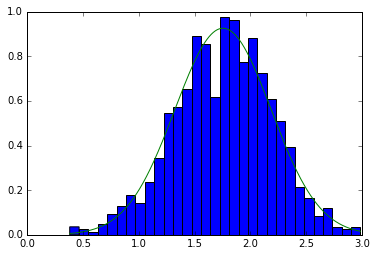

In [63]:
plt.hist(boot,normed=True,bins=int(np.sqrt(len(boot))))
print boot.mean(),boot.std()

x = np.linspace(boot.min(),boot.max(),100)
y = st.norm.pdf(x,loc=boot.mean(),scale=boot.std())
plt.plot(x,y)

El teorema del limite central dice que la distribución bootstrap del estadístico se aproxima a una distribución normal si el número **m** de remuestreos es grande.
* La media de la distribución bootstrap se encuentra cerca de la media de la muestra original. Esto es, la media de la distribución bootstrap tiene un sesgo pequeño como un estimador de la media de la muestra original. 
* Podemos calculas el **error estandar** del estadístico calculando la desviación estandar **s** de la distribución bootstrap. Sabemos que la desviación estandar de un estadístico es $\sigma / \sqrt n$, donde $\sigma$ es la desviación estadar de las observaciones individuales de la población. En general, uno lo que hace es utilizar la desviación estandar **s** de la muestra aleatoria como un *proxy* para $\sigma$.

---
**ERROR ESTANDAR BOOTSTRAP**

El error estardar bootstrap **SEboot** de un estadístico es la desviación estardar de la distribución bootstrap del estadístico. 

---


## Distribución t-student

Supongamos que tenemos una muestra con $X_i,\, i=1,..,n$ variables obtenidas de una población que sigue una distribución normal con valor de expectación $\mu$ y varianza $\sigma^2$.

Sea
\begin{equation}
\bar{X} = \frac{1}{n} \sum_{i = 1}^{n} X_{i}
\end{equation}
la media de la muestra y 
\begin{equation}
S^2=\frac{1}{n-1} \sum_{i = 1}^{n} \left( X_i - \bar{X} \right)^{2}
\end{equation}
la varianza. Entonces la variable aleatoria definida como:
\begin{equation}
\frac{\bar{X} - \mu }{\sigma/\sqrt{n}}
\end{equation}
tiene una distribución normal con valor de expetación $0$ y varianza $1$, y la variable aleatoria definida por
\begin{equation}
\frac{\bar{X} - \mu }{S/\sqrt{n}}
\end{equation}
tiene una distribución t de Student con $n-1$ grados de libertad

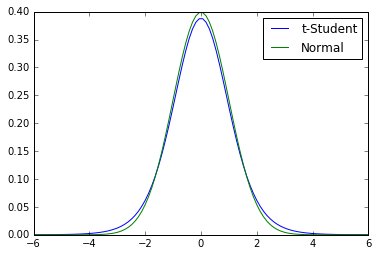

In [64]:
_x = np.linspace(-6,6,100)
_y = st.t.pdf(_x,df=n-1)
plt.plot(_x,_y,label="t-Student")

_y = st.norm.pdf(_x)
plt.plot(_x,_y,label="Normal")
plt.legend()

## Intervalo de confianza

Supongamos que la distribución bootstrap de un estadístico de una muestra de tamaño $n$ es aproximadamente gaussiana y que el sesgo de la estimación por bootstrap es pequeño. Entonces, el intervalo de confidencia de nivel **C** se define como 
\begin{equation}
estadístico \pm t^*\,\textrm{SEboot}
\end{equation}
donde SEboot es el error estardar bootstrap para este estadístico y $t^*$ es valor crítico de la distribución t de Student con $n-1$ grados de libertad con un área **C** entre $-t^*$ y $t^*$.

Supongamos que queremos un nivel de significancia del $95 \%$, o $\alpha = 0.05$. Entonces encontramos el valor de $t^*$

In [65]:
alpha = 0.05
t1 = st.t.ppf(alpha/2.0,n-1)
t2 = st.t.ppf(1.-alpha/2.0,n-1)
print t1,t2

-2.262157162740992 2.2621571627409915


Vemos que si calculamos el área bajo la distribución de probabilidad obtenemos un valor de $0.95$ aproximadamente como requerimos

In [66]:
integral = st.t.cdf(t2,n) - st.t.cdf(t1,n)
print integral

0.9528047368572256


Luego, el intervalo de confianza estará dado por

In [67]:
x1 = t1*boot.std()
x2 = t2*boot.std()
print x1,x2

-0.9751703745347629 0.9751703745347626


In [82]:
h1 = muestra.mean() + x1
h2 = muestra.mean() + x2
print "Valor medio %.2f" % muestra.mean()
print "Intervalo de confidencia 95 (%.2f, %.2f)" % (h1,h2)

Valor medio 1.80
Intervalo de confidencia 95 (0.82, 2.77)


```python
muestra.mean() +/- x1
```

# Biblioteca de Astropy

In [68]:
from astropy.stats import bootstrap
from astropy.utils import NumpyRNGContext

In [78]:
with NumpyRNGContext(1):
    bootresult = bootstrap(muestra, bootnum=1000, bootfunc=np.mean)

Media Bootstrap 1.768, Desviacion Stardar 0.449
Valor medio 1.80
Intervalo de confidencia 95 (0.78, 2.81)


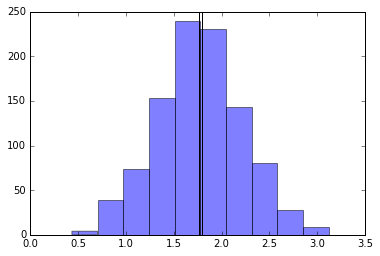

In [83]:
plt.hist(bootresult,alpha=0.5)
plt.vlines(bootresult.mean(),0.,250)
plt.vlines(muestra.mean(),0,250)
print "Media Bootstrap %.3f, Desviacion Stardar %.3f" % (bootresult.mean(),bootresult.std())

h1 = muestra.mean() + t1*bootresult.std()
h2 = muestra.mean() + t2*bootresult.std()

print "Valor medio %.2f" % muestra.mean()
print "Intervalo de confidencia 95 (%.2f, %.2f)" % (h1,h2)